In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
# Kerasに付属の手書き数字画像データをダウンロード
np.random.seed(0)
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

In [3]:
# Traning setのラベルを確認
print(labels_train)

[5 0 4 ... 5 6 8]


In [4]:
# Training set を学習データ（X_train, labels_train）と検証データ（X_validation, labels_validation）に8:2で分割する
X_train,X_validation, labels_train, labels_validation = train_test_split(X_train, labels_train,test_size = 0.2)

In [5]:
# train dataのshapeを確認
print(X_train.shape,labels_train.shape)

(48000, 28, 28) (48000,)


In [6]:
# validation dataのshapeを確認
print(X_validation.shape, labels_validation.shape)

(12000, 28, 28) (12000,)


In [7]:
# Test dataのshapeを確認
print(X_test.shape, labels_test.shape)

(10000, 28, 28) (10000,)


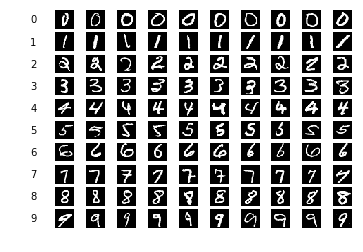

In [8]:
# Training setの画像を表示

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

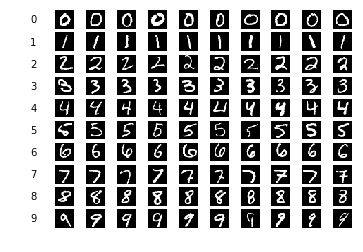

In [9]:
# Test setの画像表示

label_images = {label: [] for label in set(labels_test.tolist())}
for x, label in zip(X_test, labels_test):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

In [10]:
# 各画像は行列なので1次元に変換→X_train,X_validation,X_testを上書き
X_train=X_train.reshape(len(X_train),-1)
X_validation=X_validation.reshape(len(X_validation),-1)
X_test=X_test.reshape(len(X_test),-1)

In [11]:
# labels_train, labels_validation, labels_test をダミー変数化して y_train, y_validation, y_test に格納する
y_train=to_categorical(labels_train)
y_validation=to_categorical(labels_validation)
y_test=to_categorical(labels_test)

In [30]:
# パラメータの設定
n_features = 784
n_hidden   = 10
bias_init = 0.1

# 学習率
rate       = 0.01

# Sequentialクラスを使ってモデルを準備する
model = Sequential()

# 隠れ層を追加
model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,),
                kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1),
                bias_initializer=keras.initializers.constant(bias_init)))

model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,),
                kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1),
                bias_initializer=keras.initializers.constant(bias_init)))

model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,),
                kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1),
                bias_initializer=keras.initializers.constant(bias_init)))

model.add(Dense(n_hidden, activation='relu', input_shape=(n_features,),
                kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1),
                bias_initializer=keras.initializers.constant(bias_init)))




# 出力層を追加
model.add(Dense(10, activation='softmax', 
                kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1),
                bias_initializer=keras.initializers.constant(bias_init)))


# TensorFlowのモデルを構築
model.compile(optimizer=tf.train.AdamOptimizer(rate),
              loss='categorical_crossentropy', metrics=['mae', 'accuracy'])

In [31]:
# Early stoppingを適用してフィッティング
log = model.fit(X_train, y_train, epochs=3000, batch_size=100, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=20, 
                                                         verbose=1)],
                validation_data=(X_validation, y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/3000
48000/48000 [==============================] - 1s 27us/sample - loss: 0.7959 - mean_absolute_error: 0.0716 - acc: 0.7396 - val_loss: 0.6003 - val_mean_absolute_error: 0.0532 - val_acc: 0.8174
Epoch 2/3000
48000/48000 [==============================] - 1s 23us/sample - loss: 0.5700 - mean_absolute_error: 0.0489 - acc: 0.8356 - val_loss: 0.5120 - val_mean_absolute_error: 0.0445 - val_acc: 0.8532
Epoch 3/3000
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5430 - mean_absolute_error: 0.0462 - acc: 0.8465 - val_loss: 0.5697 - val_mean_absolute_error: 0.0510 - val_acc: 0.8284
Epoch 4/3000
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5218 - mean_absolute_error: 0.0444 - acc: 0.8529 - val_loss: 0.4790 - val_mean_absolute_error: 0.0409 - val_acc: 0.8636
Epoch 5/3000
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5041 - mean_absolute_error: 0.0426 - acc: 0.8

In [32]:
# Test dataで予測を実行。
pred_test = model.predict_classes(X_test)

In [33]:
validation = (pred_test == labels_test)
size       = validation.size
size
correct    = np.count_nonzero(validation)
print(f"{correct}/{size} correct ({correct*100/size:.3f}%)")

8081/10000 correct (80.810%)
